In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Dataset-1

In [10]:
X1 = np.random.rand(400, 100)
y1 = np.random.randint(2, size=400)

K-Means with k=2

In [11]:
scaler = StandardScaler()
X_scaled1 = scaler.fit_transform(X1)
pca = PCA(n_components=2)
X_pca1 = pca.fit_transform(X_scaled1)

In [12]:
dist1 = []
for i in range(1, 15):
    kmeans1 = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 15, random_state = 0)
    kmeans1.fit(X_pca1)
    dist1.append(kmeans1.inertia_)

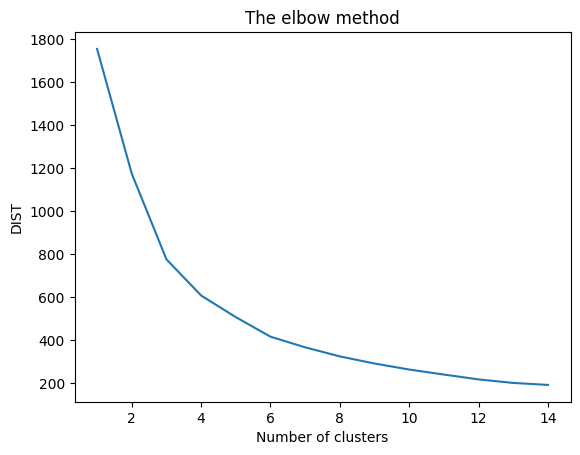

In [13]:
plt.plot(range(1, 15), dist1)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('DIST') 
plt.show()

In [14]:
kmeans1 = KMeans(n_clusters=2)
kmeans1.fit(X_pca1)
df = pd.DataFrame(data=X1, columns=[f'x{i}' for i in range(1, 101)])
df['predicted_cluster'] = kmeans1.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
kmeans1 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans1 = kmeans1.fit_predict(X_pca1) 
df['predicted_cluster']=y_kmeans1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
ari1 = adjusted_rand_score(y1, y_kmeans1)
print("Adjusted Rand Index1 (ARI):", ari1)

Adjusted Rand Index1 (ARI): -0.0024106901962768494


In [17]:
silhouette1 = silhouette_score(X_pca1, y_kmeans1)
print("Silhouette Coefficient1:", silhouette1)

Silhouette Coefficient1: 0.3165434315146029


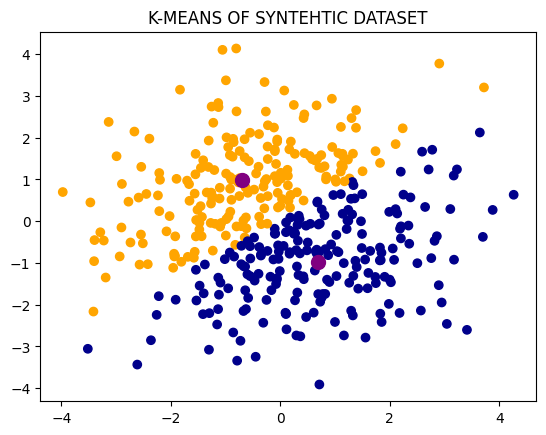

In [18]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['darkblue', 'orange'])
plt.scatter(X_pca1[:, 0], X_pca1[:, 1], c=kmeans1.labels_ , cmap=cmap)
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], s=100 , color = 'purple')
plt.title('K-MEANS OF SYNTEHTIC DATASET')
plt.show()

DBSCAN with k = 2

In [19]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [20]:
dbscan1 = DBSCAN(eps=0.5, min_samples=5)
dbscan1.fit(X_pca1)
labels = dbscan1.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print('Number of clusters found:', n_clusters)

Number of clusters found: 4


In [21]:
silhouette2 = silhouette_score(X_pca1, labels)
print("Silhouette Score 2:", silhouette2)

Silhouette Score 2: -0.08443712045810421


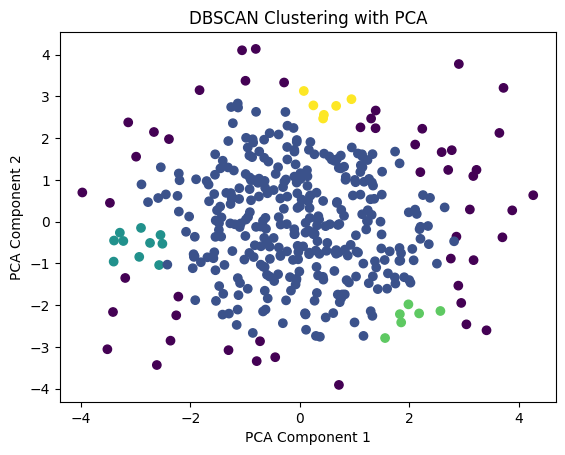

In [22]:
plt.scatter(X_pca1[:, 0], X_pca1[:, 1], c=labels)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering with PCA')
plt.show()

In [23]:
n_noise = list(labels).count(-1)
print('Number of noise points:', n_noise)

Number of noise points: 49


Unsupervised NN (autoencoder) to 20 attributes

In [24]:
import tensorflow as tf
from tensorflow import keras

In [25]:
input_layer1 = keras.layers.Input(shape=(100,))

In [26]:
encoded = keras.layers.Dense(50, activation='relu')(input_layer1)
encoded = keras.layers.Dense(30, activation='relu')(encoded)
encoded = keras.layers.Dense(20, activation='relu')(encoded)

In [27]:
decoded = keras.layers.Dense(30, activation='relu')(encoded)
decoded = keras.layers.Dense(50, activation='relu')(decoded)
decoded = keras.layers.Dense(100, activation='sigmoid')(decoded)

In [28]:
autoencoder = keras.models.Model(input_layer1, decoded)

In [29]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X1, X1, epochs=50, batch_size=32)

Epoch 1/50
13/13 [==============================] - 2s 3ms/step - loss: 0.6933
Epoch 2/50
13/13 [==============================] - 0s 3ms/step - loss: 0.6929
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 0.6926
Epoch 4/50
13/13 [==============================] - 0s 3ms/step - loss: 0.6922
Epoch 5/50
13/13 [==============================] - 0s 3ms/step - loss: 0.6916
Epoch 6/50
13/13 [==============================] - 0s 3ms/step - loss: 0.6906
Epoch 7/50
13/13 [==============================] - 0s 2ms/step - loss: 0.6893
Epoch 8/50
13/13 [==============================] - 0s 3ms/step - loss: 0.6880
Epoch 9/50
13/13 [==============================] - 0s 2ms/step - loss: 0.6866
Epoch 10/50
13/13 [==============================] - 0s 3ms/step - loss: 0.6854
Epoch 11/50
13/13 [==============================] - 0s 3ms/step - loss: 0.6843
Epoch 12/50
13/13 [==============================] - 0s 3ms/step - loss: 0.6832
Epoch 13/50
13/13 [==============================

In [30]:
encoder = keras.models.Model(input_layer1, encoded)
X1_compressed = encoder.predict(X1)

13/13 [==============================] - 0s 2ms/step


In [31]:
X1_compressed.shape

(400, 20)

K-means for compressed data

In [32]:
scaler = StandardScaler()
X_scaled2 = scaler.fit_transform(X1_compressed)
pca = PCA(n_components=2)
X_pca2 = pca.fit_transform(X_scaled2)

In [33]:
dist2 = []
for i in range(1, 15):
    kmeans2 = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 15, random_state = 0)
    kmeans2.fit(X_pca2)
    dist2.append(kmeans2.inertia_)

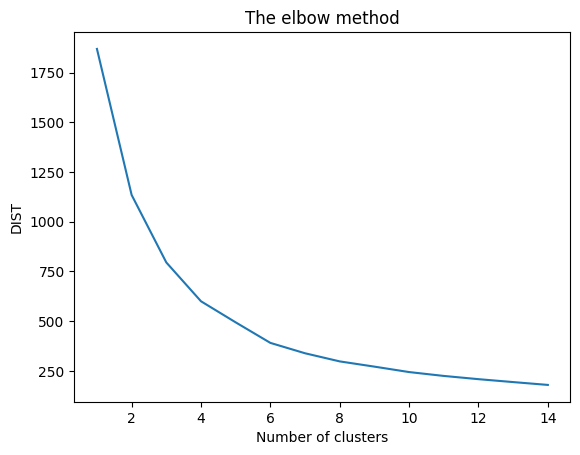

In [34]:
plt.plot(range(1, 15), dist2)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('DIST') 
plt.show()

In [35]:
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(X_pca2)
df = pd.DataFrame(data=X1_compressed, columns=[f'x{i}' for i in range(1, 21)])
df['predicted_cluster'] = kmeans2.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
kmeans2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans2 = kmeans2.fit_predict(X_pca2) 
df['predicted_cluster']=y_kmeans2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [37]:
silhouette3 = silhouette_score(X_pca2, y_kmeans2)
print("Silhouette Coefficient 3:", silhouette3)

Silhouette Coefficient 3: 0.3504451


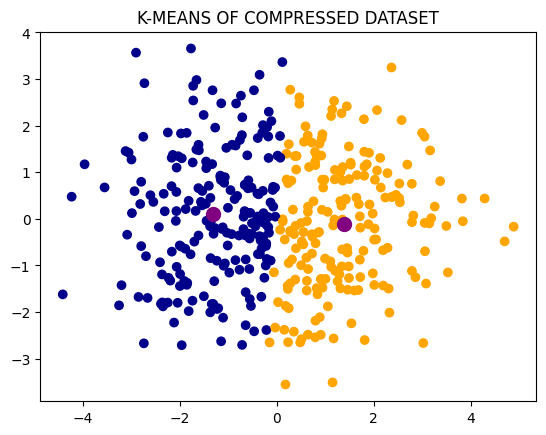

In [38]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['darkblue', 'orange'])
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=kmeans2.labels_ , cmap=cmap)
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s=100 , color = 'purple')
plt.title('K-MEANS OF COMPRESSED DATASET')
plt.show()

DBSCAN for compressed data

In [39]:
dbscan2 = DBSCAN(eps=0.5, min_samples=5)
dbscan2.fit(X_pca2)
labels = dbscan2.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print('Number of clusters found:', n_clusters)

Number of clusters found: 1


In [40]:
silhouette4 = silhouette_score(X_pca2, labels)
print("Silhouette Score 4:", silhouette4)

Silhouette Score 4: 0.310029


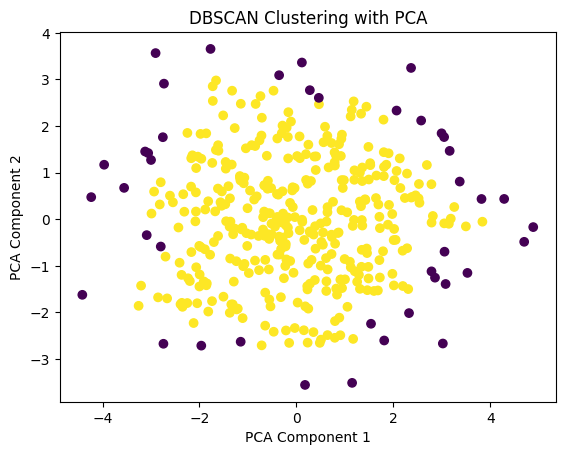

In [41]:
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=labels)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering with PCA')
plt.show()

In [42]:
n_noise = list(labels).count(-1)
print('Number of noise points:', n_noise)

Number of noise points: 42


 .

.

.

.

.

DATASET - 2

In [43]:
X2 = np.random.rand(500, 200)
y2 = np.random.randint(3, size=500)

K-Means with k=3

In [44]:
scaler = StandardScaler()
X_scaled3 = scaler.fit_transform(X2)
pca = PCA(n_components=2)
X_pca3 = pca.fit_transform(X_scaled3)

In [45]:
dist3 = []
for i in range(1, 15):
    kmeans3 = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 15, random_state = 0)
    kmeans3.fit(X_pca3)
    dist3.append(kmeans3.inertia_)

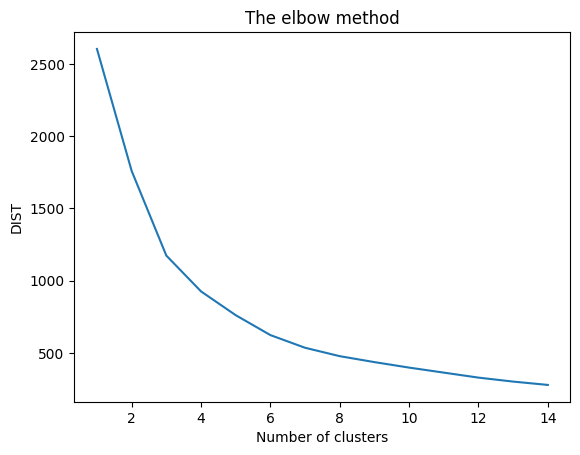

In [46]:
plt.plot(range(1, 15), dist3)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('DIST') 
plt.show()

In [47]:
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(X_pca3)
df = pd.DataFrame(data=X2, columns=[f'x{i}' for i in range(1, 201)])
df['predicted_cluster'] = kmeans3.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [48]:
kmeans3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans3 = kmeans3.fit_predict(X_pca3) 
df['predicted_cluster']=y_kmeans3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [49]:
ari2 = adjusted_rand_score(y2, y_kmeans3)
print("Adjusted Rand Index3 (ARI):", ari2)

Adjusted Rand Index3 (ARI): -0.002589882877244893


In [50]:
silhouette5 = silhouette_score(X_pca3, y_kmeans3)
print("Silhouette Coefficient 5:", silhouette5)

Silhouette Coefficient 5: 0.32953201463529114


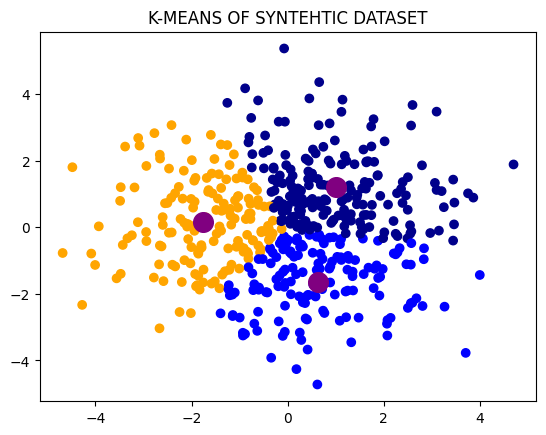

In [51]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['darkblue', 'orange', 'blue'])
plt.scatter(X_pca3[:, 0], X_pca3[:, 1], c=kmeans3.labels_ , cmap=cmap)
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], s=200 , color = 'purple')
plt.title('K-MEANS OF SYNTEHTIC DATASET')
plt.show()

DBSCAN with k=3

In [52]:

dbscan3 = DBSCAN(eps=0.5, min_samples=5)
dbscan3.fit(X_pca3)
labels = dbscan3.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print('Number of clusters found:', n_clusters)

Number of clusters found: 4


In [53]:
silhouette6 = silhouette_score(X_pca3, labels)
print("Silhouette Score 6:", silhouette6)

Silhouette Score 6: 0.026386765990268585


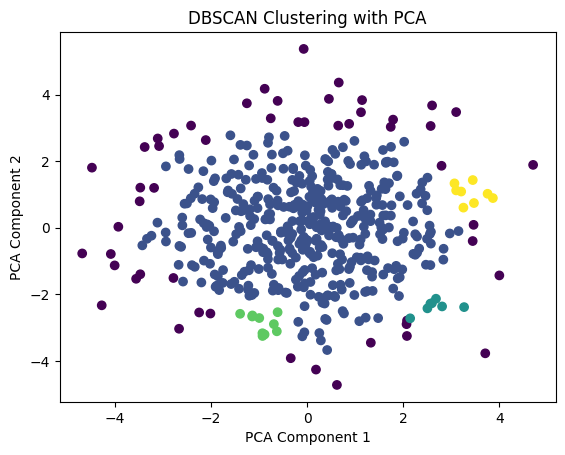

In [54]:
plt.scatter(X_pca3[:, 0], X_pca3[:, 1], c=labels)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering with PCA')
plt.show()

In [55]:
n_noise = list(labels).count(-1)
print('Number of noise points:', n_noise)

Number of noise points: 52


Unsupervised NN (autoencoder) to 20 attributes

In [56]:
input_layer2 = keras.layers.Input(shape=(200,))

In [57]:
encoded = keras.layers.Dense(100, activation='relu')(input_layer2)
encoded = keras.layers.Dense(50, activation='relu')(encoded)
encoded = keras.layers.Dense(20, activation='relu')(encoded)

In [58]:
decoded = keras.layers.Dense(50, activation='relu')(encoded)
decoded = keras.layers.Dense(100, activation='relu')(decoded)
decoded = keras.layers.Dense(200, activation='sigmoid')(decoded)

In [59]:
autoencoder1 = keras.models.Model(input_layer2, decoded)

In [60]:
autoencoder1.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder1.fit(X2, X2, epochs=100, batch_size=32)

Epoch 1/100
16/16 [==============================] - 2s 3ms/step - loss: 0.6932
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6929
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6924
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6917
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6906
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6893
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6879
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6866
Epoch 9/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6854
Epoch 10/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6842
Epoch 11/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6832
Epoch 12/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6824
Epoch 13/100
16/16 [=================

In [61]:
encoder = keras.models.Model(input_layer2, encoded)
X2_compressed = encoder.predict(X2)

16/16 [==============================] - 0s 1ms/step


In [62]:
X2_compressed.shape

(500, 20)

K-Means for Compressed Data

In [63]:
scaler = StandardScaler()
X_scaled4 = scaler.fit_transform(X2_compressed)
pca = PCA(n_components=2)
X_pca4 = pca.fit_transform(X_scaled4)

In [64]:
dist4 = []
for i in range(1, 15):
    kmeans4 = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 15, random_state = 0)
    kmeans4.fit(X_pca4)
    dist4.append(kmeans4.inertia_)

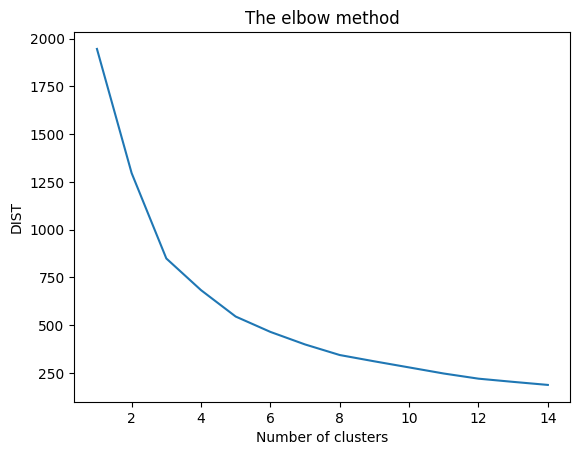

In [65]:
plt.plot(range(1, 15), dist4)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('DIST') 
plt.show()

In [66]:
kmeans4 = KMeans(n_clusters=3)
kmeans4.fit(X_pca4)
df = pd.DataFrame(data=X2_compressed, columns=[f'x{i}' for i in range(1, 21)])
df['predicted_cluster'] = kmeans4.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [67]:
kmeans4 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans4 = kmeans4.fit_predict(X_pca4) 
df['predicted_cluster']=y_kmeans4

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [68]:
silhouette7 = silhouette_score(X_pca4, y_kmeans4)
print("Silhouette Coefficient 7:", silhouette7)

Silhouette Coefficient 7: 0.37691084


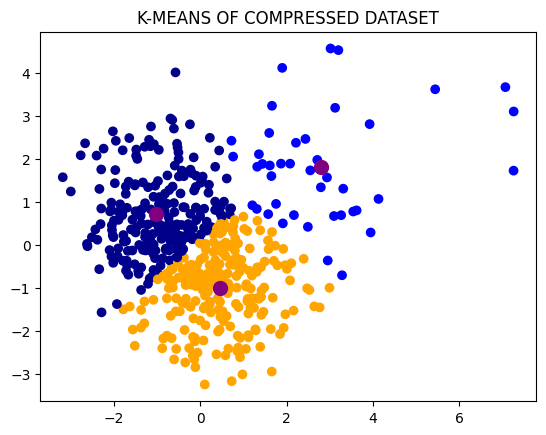

In [69]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['darkblue', 'orange' , 'blue'])
plt.scatter(X_pca4[:, 0], X_pca4[:, 1], c=kmeans4.labels_ , cmap=cmap)
plt.scatter(kmeans4.cluster_centers_[:, 0], kmeans4.cluster_centers_[:, 1], s=100 , color = 'purple')
plt.title('K-MEANS OF COMPRESSED DATASET')
plt.show()

DBSCAN for Compressed Dataset

In [70]:
dbscan4 = DBSCAN(eps=0.5, min_samples=5)
dbscan4.fit(X_pca4)
labels = dbscan4.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print('Number of clusters found:', n_clusters)

Number of clusters found: 4


In [71]:
silhouette8 = silhouette_score(X_pca4, labels)
print("Silhouette Score 8:", silhouette8)

Silhouette Score 8: 0.15462041


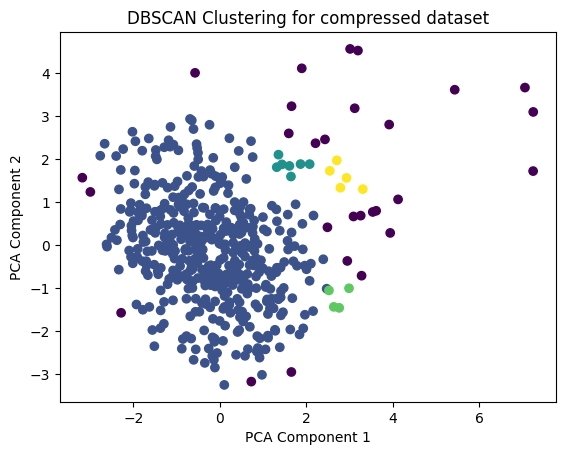

In [72]:
plt.scatter(X_pca4[:, 0], X_pca4[:, 1], c=labels)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering for compressed dataset')
plt.show()

In [73]:
n_noise = list(labels).count(-1)
print('Number of noise points:', n_noise)

Number of noise points: 28
